<a href="https://colab.research.google.com/github/MikeDeecode/US-accidental--drugs-death-analysis/blob/master/US_accidental_drugs_death.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set used in this project was obtained from https://www.data.gov/

## **THE DATASET CONTAINS THE DATA OF ACCIDENTAL DRUGS RELATED DEATH IN THE US FROM 2012 TO 2016**

---



This project aims aat 

* Determine how each of the characteristics affected the death toll
* Visualising the analysed data
* Insigts and observations from the data

Stay tuned!!!

# **EXPLORATORY ANALYSIS**

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
drugs_death = pd.read_csv("/content/Accidental_Drug_Related_Deaths_2012-2018.csv", index_col = 0)
print ("Success")

Success


In [24]:
drugs_death.shape

(5105, 40)

* There are 5105 rows and 40 columns in the dataset 

**DESCRIPTION OF THE DATASET**

There are 5105 rowa and 40 columns in the dataset.  Below are the descriptions of the columns 

* **ID** - citizen's identification number 
* **Date** - The date authorities knew about the death
* **Dateatype** - If the date the individual died was the reported date or the day of death
* **Age** - Age of the individual
* **Sex** - Gender of the individual
* **Race** - The race of the individual
* **ResidenceCity** - The city the individual lived in 
* **ResidenceCounty** - Individual's county
* **ResidenceState** - Individual's state 
* **DeathCity** - city where the individual died 
* **DeathCounty** - County where the individual died 
* **Location** - specific place where the individual died
* **LocationifOther**
* **DescriptionofInjury** - Description of injury that killed the individual
* **InjuryPlace** - where the injury was sustained
* **InjuryCity** - city where the injury was sustained 
* **InjuryCounty** - County where the injury was sustained 
* **InjuryState** - State where the injuty was sustained 
* **COD** - Cause of death
* **OtherSignifican**
* **MannerofDeath** - how the individual died 
* **DeathCityGeo** - Geogrgraphical location of where the individual died 
* **ResidenceCityGeo** - geographical location of individual's residence city 
* **InjuryCityGeo** - geographical location of where the individual sustained injury

Other columns in the dataset are the substances presnt in the blood or urine of the individuals after the autopsy report

In [25]:
drugs_death.head()

,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,NaN,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,NaN,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,NaN,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [26]:
drugs_death.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5105 entries, 14-0273 to 16-0637
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 5103 non-null   object 
 1   DateType             5103 non-null   object 
 2   Age                  5102 non-null   float64
 3   Sex                  5099 non-null   object 
 4   Race                 5092 non-null   object 
 5   ResidenceCity        4932 non-null   object 
 6   ResidenceCounty      4308 non-null   object 
 7   ResidenceState       3556 non-null   object 
 8   DeathCity            5100 non-null   object 
 9   DeathCounty          4005 non-null   object 
 10  Location             5081 non-null   object 
 11  LocationifOther      590 non-null    object 
 12  DescriptionofInjury  4325 non-null   object 
 13  InjuryPlace          5039 non-null   object 
 14  InjuryCity           3349 non-null   object 
 15  InjuryCounty         2364 non-null

* As seen above the dataset contains a lot of missing values 

I would like to add another column to the dataset which is Age group. 

This would gibe me a better understanding of the data

In [0]:
bins = [0, 18, 60, 100]
labels = ['Minor (0 to 17)', 'Adult (18 to 59)', 'Senior Citizens']
drugs_death['Age group'] = pd.cut(drugs_death['Age'], bins = bins, labels = labels, right = False)

In [49]:
drugs_death.tail()

,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,MannerofDeath,Age group
ID,,,,,,,,,,,,,,,,,,,
15-0466,09/08/2015 12:00:00 AM,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,NEW HAVEN,Residence,NaN,Residence,NaN,NaN,NaN,Acute Intoxication due to the Combined Effects...,Accident,Adult (18 to 59)
17-0618,07/22/2017 12:00:00 AM,DateReported,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,Hospital,Drug Abuse,In Vehicle,NaN,NaN,NaN,"Multidrug Toxicity Including Heroin, Alprazola...",Accident,Adult (18 to 59)
18-0646,08/14/2018 12:00:00 AM,DateofDeath,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,FAIRFIELD,Other,Drug abuse,Hotel or Motel,DANBURY,FAIRFIELD,NaN,"Multidrug Toxicity Including Heroin, Fentanyl,...",Accident,Adult (18 to 59)
14-0124,03/16/2014 12:00:00 AM,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,NaN,Other,Substance Abuse,Hotel or Motel,NaN,NaN,NaN,Acute Fentanyl intoxication,Accident,Adult (18 to 59)
16-0637,09/15/2016 12:00:00 AM,DateofDeath,33.0,Male,White,THOMASTON,LITCHFIELD,CT,WATERBURY,NaN,Other,Substance Abuse,Railroad Track,"WATERBURY, CT",NaN,NaN,Acute Heroin Intoxication,Accident,Adult (18 to 59)


* The Age group column has been added to the data 

Here I removed the columns I do not want to perfrom analysis on 

In [0]:
drugs_death.drop(columns = ['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone',
                            'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 
                            'Other', 'OpiateNOS', 'AnyOpioid', 'OtherSignifican', 'DeathCityGeo', 
                            'ResidenceCityGeo', 'InjuryCityGeo', 'LocationifOther'], inplace = True)

Below are the remaining columns in the data

In [30]:
drugs_death.head()

,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,MannerofDeath,Age group
ID,,,,,,,,,,,,,,,,,,,
14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",Accident,NaN
13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,Accident,Adult
16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,Accident,Adult
16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,Accident,Adult
13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,Accident,Adult


###DATE TYPE

**PERCENTAGE OF DATE OF DEATH TO DATE DEATH WAS REPORTED**

In [31]:
drugs_death['DateType'].value_counts()

DateofDeath     2822
DateReported    2281
Name: DateType, dtype: int64

* 2822 deaths were confirmed by the officials 
* 2281 deaths were reported

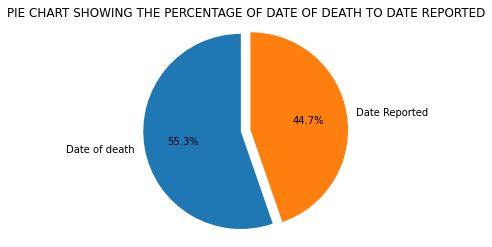

In [32]:
labels = 'Date of death', 'Date Reported'
size = [2822, 2281]
explode = [0, 0.1]

fig1, ax1 = plt.subplots()
ax1.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.title("PIE CHART SHOWING THE PERCENTAGE OF DATE OF DEATH TO DATE REPORTED")
plt.show()

* 55.3 percent of the deaths were confirmed by the officials
* 44.7 percent of the deaths were reported to the authorities

###SEX

**NUMBER OF PEOPLE THAT DIED FROM DRUGS BY GENDER**

In [33]:
drugs_death['Sex'].value_counts()

Male       3773
Female     1325
Unknown       1
Name: Sex, dtype: int64

* 3773 men died from drugs 
* 1325 women died from drugs

The sex of 1 person was not specified 

###RACE

**NUMBER OF DEATHS BY RACE**

In [34]:
drugs_death['Race'].value_counts()

White                     4004
Hispanic, White            561
Black                      433
Hispanic, Black             24
Unknown                     23
Asian, Other                18
Asian Indian                14
Other                       11
Chinese                      2
Hawaiian                     1
Native American, Other       1
Name: Race, dtype: int64

* The white race experienced the most deaths from drugs with 4004 deaths
* The races with the lowest death toll were Native American (Other) and Hawaiian with a death each

**DEATHS BY GENDER AND RACE**

In [35]:
import seaborn as sns
print("Success")

Success


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


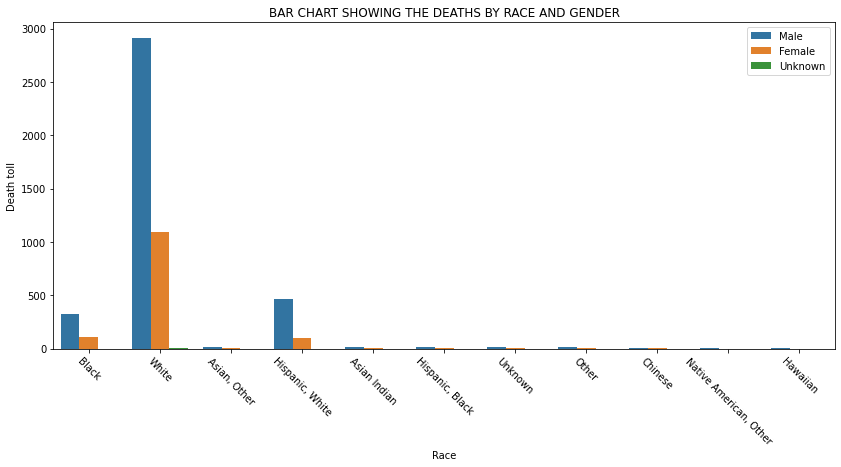

In [47]:
plt.figure(figsize = (14, 6))

sns.countplot('Race', hue = 'Sex', data = drugs_death)
plt.title("BAR CHART SHOWING THE DEATHS BY RACE AND GENDER")
plt.xticks(rotation = -45)
plt.legend(loc = 'upper right')
plt.ylabel("Death toll")
plt.show()

* Men had a higher death toll across all races
* We can say that more men died from drugs than women 

###DEATH LOCATION

**DEATH BY DEATH LOCATION**

In [37]:
drugs_death['Location'].value_counts()

Residence            2677
Hospital             1626
Other                 773
Convalescent Home       3
Nursing Home            1
Hospice                 1
Name: Location, dtype: int64

* Most of the individuals died at their residence with 2677
* The number of people who died in hospitals was also relatively high with 1626 deaths

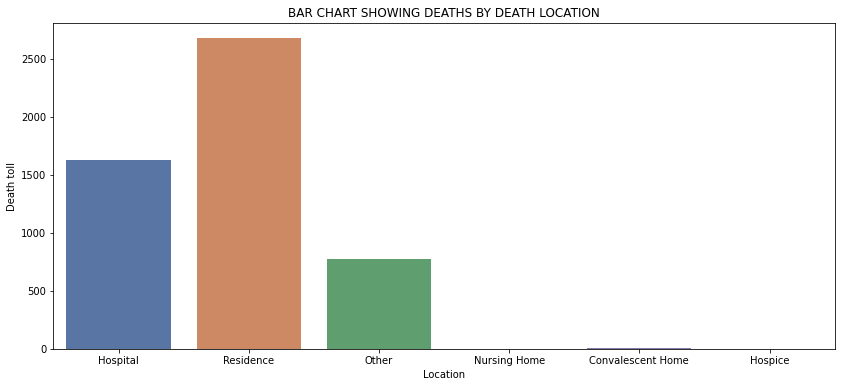

In [38]:
plt.figure(figsize = (14, 6))
sns.countplot('Location', data = drugs_death, palette = 'deep')
plt.title("BAR CHART SHOWING DEATHS BY DEATH LOCATION")
plt.ylabel("Death toll")
plt.show()

###MANNER OF DEATH

**DEATH TOLL BY MANNER OF DEATH**

In [39]:
drugs_death['MannerofDeath'].value_counts()

Accident    5066
Pending       14
accident      13
Natural        1
ACCIDENT       1
Name: MannerofDeath, dtype: int64

* There is a case inconsistency in the data that we have to deal with 

In [0]:
drugs_death['MannerofDeath'].replace(to_replace = 'ACCIDENT', value = 'Accident', inplace = True)
drugs_death['MannerofDeath'].replace(to_replace = 'accident', value = 'Accident', inplace = True)


In [41]:
drugs_death['MannerofDeath'].value_counts()

Accident    5080
Pending       14
Natural        1
Name: MannerofDeath, dtype: int64

* Most people died by accident here with 5000
* Only 1 person died naturally 
* The manner of death of 14 people are pending 

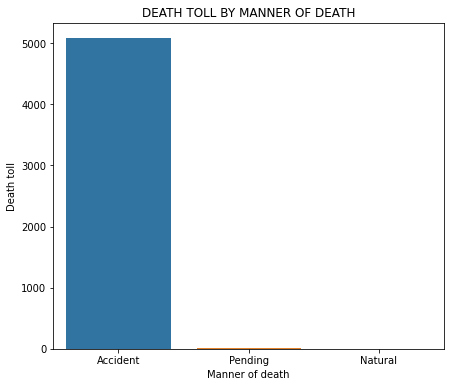

In [42]:
plt.figure(figsize = (7, 6))
sns.countplot('MannerofDeath', data = drugs_death)
plt.title("DEATH TOLL BY MANNER OF DEATH")
plt.ylabel("Death toll")
plt.xlabel("Manner of death")
plt.show()

##RESIDENCE STATE

**DEATH TOLL BY RESIDENCE CITY**

In [43]:
drugs_death['ResidenceState'].value_counts()

CT    3442
NY      29
MA      23
FL      10
NJ      10
RI       8
PA       5
TX       4
ME       4
CA       3
CO       2
IL       2
NC       1
LA       1
TN       1
OH       1
AL       1
MN       1
VT       1
MD       1
NH       1
GA       1
SC       1
SD       1
OK       1
MI       1
Name: ResidenceState, dtype: int64

* Most of the individual libed in Connecticut which suggest that the rate drugs are being used in Connecticut is alarming 

Lets see how high it is in the bar chart below 

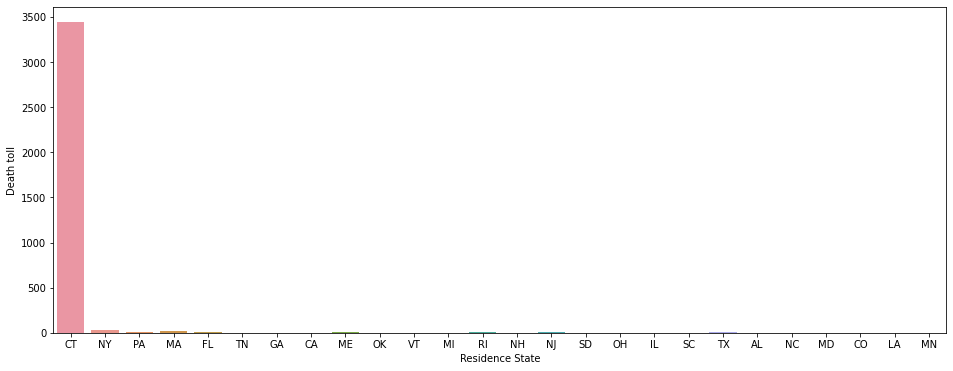

In [44]:
plt.figure(figsize = (16, 6))
sns.countplot('ResidenceState', data = drugs_death)
plt.xlabel("Residence State")
plt.ylabel("Death toll")
plt.show()

Furhter analysis can be done on this data set

I will explore other features as time goes on 

###AGE GROUP

**NUMBER OF DEATHS BY AGE GROUP**

In [50]:
drugs_death['Age group'].value_counts()

Adult (18 to 59)    4699
Senior Citizens      390
Minor (0 to 17)       13
Name: Age group, dtype: int64

* The adults died most from drugs with 4699 deaths 

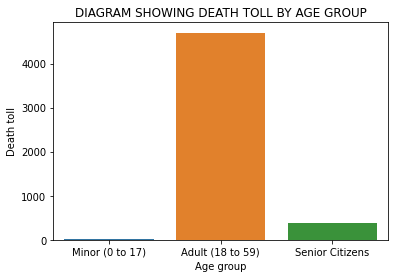

In [52]:
sns.countplot('Age group', data = drugs_death)
plt.title("DIAGRAM SHOWING DEATH TOLL BY AGE GROUP")
plt.ylabel("Death toll")
plt.show()

#**THANK YOU FOR VIEWING MY PROJECT**